In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data, print_param_count, plot_training_epochs
from src.models import *
from src.trainer import Trainer
import numpy as np
import matplotlib.pyplot as plt 
from src.utils import multi_plot_training_epochs

# Look at data

In [2]:
tr_inp, tr_bool, tr_digits, te_inp, te_bool, te_digits = generate_pair_sets(
1000)

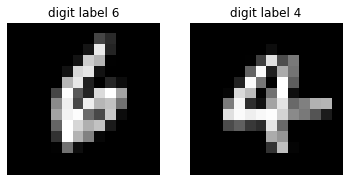

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#fig.suptitle("Class label {}".format(tr_bool[0]))

for i in range(2):
    axes[i].imshow(tr_inp[0][i], cmap="gray")
    axes[i].set_axis_off()
    axes[i].set_title('digit label {}'.format(tr_digits[0][i]))

plt.savefig("figures/data.png", dpi=300)
plt.show()

# Universal Params

In [4]:
nb_epochs = 25
n_cv = 1

## Model 1
- FC baseline

In [5]:
train_losses_fc = []
train_accuracies_fc = []
validation_accuracies_fc = []
test_accuracies_fc = []
#results = []
for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    # Import data
    dl_train_target, dl_val_target, dl_test_target = load_target_data(normalize=True)

    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, verbose=False, run='fc_baseline')

    # Model
    model = LinearBaseline()

    # Training
    loss_train, acc_train, acc_val = trainer.fit(model, dl_train_target, dl_val_target, verbose=True)
    train_losses_fc.append(loss_train)
    train_accuracies_fc.append(acc_train)
    validation_accuracies_fc.append(acc_val)
    
    # Testing
    acc_test = trainer.test(model, dl_test_target, test_verbose=False, return_acc=True)
    test_accuracies_fc.append(acc_test)

Run 1/1


KeyboardInterrupt: 

In [6]:
# Print Results
train_losses_fc = np.mean(np.array(train_losses_fc), axis=0)
train_accuracies_fc = np.mean(np.array(train_accuracies_fc), axis=0)
validation_accuracies_fc = np.mean(np.array(validation_accuracies_fc), axis=0)
avg_test_acc_fc = np.mean(test_accuracies_fc)
print('avg test acc', avg_test_acc_fc)
stdev_test_acc_fc = np.std(test_accuracies_fc)
print('stdev test acc', stdev_test_acc_fc)

avg test acc 53.61
stdev test acc 0.0


## Model 2
- FC with aux loss

In [7]:
test_accuracies_fc_aux = []
train_accuracies_fc_aux = []
validation_accuracies_fc_aux = []
train_losses_fc_aux = []

for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")

    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, verbose=False, run='fc_aux_argmax')

    # Import data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

    # Model
    alpha = LinearAlpha()
    beta = LinearBeta(label_encoded=False)
    model = Siamese(alpha, beta, weight_aux=0.5, softmax=False, 
                    argmax=False, strategy='sum')

    # Training
    loss_train, acc_train, acc_val = trainer.fit(model, dl_train_all, dl_val_all, verbose=True)
    train_losses_fc_aux.append(loss_train)
    validation_accuracies_fc_aux.append(acc_val)
    train_accuracies_fc_aux.append(acc_train)
    
    # Testing
    acc = trainer.test(model, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_fc_aux.append(acc)

Run 1/10
# Epoch 1/2:	 loss=1.86	 loss_val=0.71	 acc_val=45.09
# Epoch 2/2:	 loss=1.76	 loss_val=0.7	 acc_val=45.09
loss_test=0.7	 acc_test=44.73


In [8]:
# Print results
train_losses_fc_aux = np.mean(np.array(
                        train_losses_fc_aux), axis=0)
train_accuracies_fc_aux = np.mean(np.array(
                            train_accuracies_fc_aux), axis=0)
validation_accuracies_fc_aux = np.mean(np.array(
                                validation_accuracies_fc_aux), axis=0)
avg_test_acc_fc_aux = np.mean(test_accuracies_fc_aux)
print('avg test acc', avg_test_acc_fc_aux)
stdev_test_acc_fc_aux = np.std(test_accuracies_fc_aux)
print('stdev test acc', stdev_test_acc_fc_aux)

avg test acc 44.73
stdev test acc 0.0


## Plot FC models

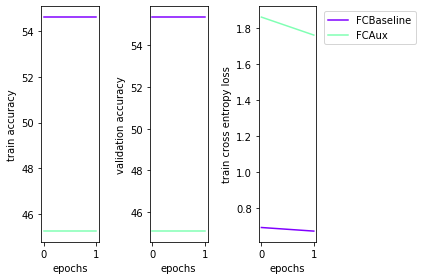

In [9]:
train_losses = [train_losses_fc, train_losses_fc_aux]
train_accuracies = [train_accuracies_fc, train_accuracies_fc_aux]
val_accuracies = [validation_accuracies_fc, validation_accuracies_fc_aux]
labels = ["FCBaseline", "FCAux"]
plt = multi_plot_training_epochs(nb_epochs, train_losses,
                                train_accuracies, val_accuracies,
                                labels, savefig="figures/FC_learning.png")

# Conv models
## Model 4
- Convnet without auxiliary loss

In [10]:
train_losses_convnet = []
train_accuracies_convnet = []
validation_accuracies_convnet = []
test_accuracies_convnet = []

for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    # Load Data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    
    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run="conv_no_aux")

    # Models
    le_net = LeNet()
    linear = nn.Linear(20, 2)
    siamese_le_net = Siamese(le_net, target=linear, weight_aux=0., strategy="sum",
                            softmax=False, argmax=False)
    
    # Training
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_convnet.append(loss_train)
    train_accuracies_convnet.append(acc_train)
    validation_accuracies_convnet.append(acc_val)
    
    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, 
                           return_acc=True)
    test_accuracies_convnet.append(acc_test)

cv iter 0
# Epoch 1/2:	 loss=0.65	 loss_val=0.52	 acc_val=76.34
# Epoch 2/2:	 loss=0.43	 loss_val=0.36	 acc_val=82.14
loss_test=0.38	 acc_test=83.69


In [11]:
# Print results
train_losses_convnet = np.mean(np.array(train_losses_convnet), axis=0)
train_accuracies_convnet = np.mean(np.array(train_accuracies_convnet), axis=0)
validation_accuracies_convnet = np.mean(np.array(validation_accuracies_convnet), axis=0)

avg_test_acc_convnet = np.mean(test_accuracies_convnet)
print('avg test acc', avg_test_acc_convnet)
stdev_test_acc_convnet = np.std(test_accuracies_convnet)
print('stdev test acc', stdev_test_acc_convnet)

avg test acc 83.69
stdev test acc 0.0


## Model 4
- Convnet with auxiliary loss

In [12]:
train_losses_conv_aux = []
train_accuracies_conv_aux = []
validation_accuracies_conv_aux = []
test_accuracies_conv_aux = []

In [14]:
for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")

    # Load data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

    # Models
    weight = 0.8
    tail_net = nn.Linear(20,2)
    siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     argmax=False,
                                     strategy="sum",
                                     target=tail_net, 
                                     weight_aux=weight)
    
    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run="conv_aux")

    # Training
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_conv_aux.append(loss_train)
    train_accuracies_conv_aux.append(acc_train)
    validation_accuracies_conv_aux.append(acc_val)
    
    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_conv_aux.append(acc_test)

Run 1/1
# Epoch 1/2:	 loss=2.51	 loss_val=0.65	 acc_val=59.82
# Epoch 2/2:	 loss=1.88	 loss_val=0.62	 acc_val=62.5
loss_test=0.56	 acc_test=66.89


In [15]:
# Print results
train_losses_conv_aux = np.mean(np.array(train_losses_conv_aux), axis=0)
train_accuracies_conv_aux = np.mean(np.array(train_accuracies_conv_aux), axis=0)
validation_accuracies_conv_aux = np.mean(np.array(validation_accuracies_conv_aux), axis=0)

avg_test_acc_conv_aux = np.mean(test_accuracies_conv_aux)
stdev_test_acc_conv_aux = np.std(test_accuracies_conv_aux)
print('avg test acc', avg_test_acc_conv_aux)
print('stdev', stdev_test_acc_conv_aux)

avg test acc 66.89
stdev 0.0


## Model 5
- Direct digit prediction

In [16]:
train_accuracies_digits = []
train_losses_digits = []
validation_accuracies_digits = []
test_accuracies_digits = []

for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    # Load data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    
    # Models
    le_net = LeNet()
    siamese_le_net = Siamese(le_net, target=None, softmax=False,
                             argmax=False, strategy="sum", 
                             weight_aux=0.)

    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run='digit')

    # Training
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_digits.append(loss_train)
    train_accuracies_digits.append(acc_train)
    validation_accuracies_digits.append(acc_val)

    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    
    test_accuracies_digits.append(acc_test)

cv iter 0
# Epoch 1/2:	 loss=1.98	 loss_val=1.42	 acc_val=79.91
# Epoch 2/2:	 loss=0.83	 loss_val=0.66	 acc_val=87.05
loss_test=0.52	 acc_test=88.18


In [17]:
# Print results
train_losses_digits = np.mean(np.array(train_losses_digits), axis=0)
train_accuracies_digits = np.mean(np.array(train_accuracies_digits),
                                 axis=0)
validation_accuracies_digits = np.mean(np.array(validation_accuracies_digits),
                                      axis=0)

avg_test_acc_digits = np.mean(test_accuracies_digits)
stdev_test_acc_digits = np.std(test_accuracies_digits)
print('test acc', avg_test_acc_digits)
print('stdev', stdev_test_acc_digits)

test acc 88.18
stdev 0.0


## Model 6
- convnet with aux loss and tailnet

In [18]:
test_accuracies_conv_tail = []
train_losses_conv_tail = []
train_accuracies_conv_tail = []
validation_accuracies_conv_tail = []

In [19]:
for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    
    # Load data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

    # Models
    weight=0.6
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=False)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight,
                            softmax=False,
                            argmax=False,
                            strategy='sum')

    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run='conv_aux_tail')
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_conv_tail.append(loss_train)
    train_accuracies_conv_tail.append(acc_train)
    validation_accuracies_conv_tail.append(acc_val)
    
    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_conv_tail.append(acc_test)

# Epoch 1/2:	 loss=1.84	 loss_val=0.58	 acc_val=76.79
# Epoch 2/2:	 loss=1.01	 loss_val=0.36	 acc_val=86.16
loss_test=0.4	 acc_test=82.03


In [20]:
# Print results
train_losses_conv_tail = np.mean(np.array(train_losses_conv_tail), axis=0)
train_accuracies_conv_tail = np.mean(np.array(train_accuracies_conv_tail), axis=0)
validation_accuracies_conv_tail = np.mean(np.array(validation_accuracies_conv_tail), axis=0)

avg_test_acc_conv_tail = np.mean(test_accuracies_conv_tail)
stdev_test_acc_conv_tail = np.std(test_accuracies_conv_tail)
print('avg test acc', avg_test_acc_conv_tail)
print('stdev test acc', stdev_test_acc_conv_tail)

avg test acc 82.03
stdev test acc 0.0


## Model 7 
- softmax in convnet

In [21]:
test_accuracies_tailnet_softmax = []
train_losses_tailnet_softmax = []
train_accuracies_tailnet_softmax = []
validation_accuracies_tailnet_softmax = []

In [22]:
for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    
    # Load data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

    # Models
    weight = 0.6
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=False)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight,
                            strategy='sum',
                            softmax=True,
                            argmax=False)
    
    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run='conv_softmax')

    # Training
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_tailnet_softmax.append(loss_train)
    train_accuracies_tailnet_softmax.append(acc_train)
    validation_accuracies_tailnet_softmax.append(acc_val)
    
    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_tailnet_softmax.append(acc_test)

# Epoch 1/2:	 loss=1.88	 loss_val=0.7	 acc_val=48.21
# Epoch 2/2:	 loss=1.16	 loss_val=0.63	 acc_val=66.07
loss_test=0.62	 acc_test=69.14


In [23]:
# Print results
train_losses_tailnet_softmax = np.mean(np.array(train_losses_tailnet_softmax),
                                      axis=0)
train_accuracies_tailnet_softmax = np.mean(np.array(train_accuracies_tailnet_softmax),
                                          axis=0)
validation_accuracies_tailnet_softmax = np.mean(np.array(validation_accuracies_tailnet_softmax),
                                               axis=0)

avg_test_acc_tailnet_softmax = np.mean(test_accuracies_tailnet_softmax)
stdev_test_acc_tailnet_softmax = np.std(test_accuracies_tailnet_softmax)
print('avg test acc', avg_test_acc_tailnet_softmax)
print('stdev test acc', stdev_test_acc_tailnet_softmax)

avg test acc 69.14
stdev test acc 0.0


## Model 8 
-argmax in convnet

In [24]:
test_accuracies_tailnet_argmax = []
train_losses_tailnet_argmax = []
train_accuracies_tailnet_argmax = []
validation_accuracies_tailnet_argmax = []

In [25]:
for i in range(n_cv):
    print(f"Run {i+1}/{n_cv}")
    
    # Load data
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    
    # Models
    best_weight = 0.6
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=True)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=best_weight,
                            strategy='sum',
                            softmax=False,
                            argmax=True)
    
    # Trainer
    trainer = Trainer(nb_epochs=nb_epochs, run='conv_argmax')
    
    # Training
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses_tailnet_argmax.append(loss_train)
    train_accuracies_tailnet_argmax.append(acc_train)
    validation_accuracies_tailnet_argmax.append(acc_val)
    
    # Testing
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies_tailnet_argmax.append(acc_test)

# Epoch 1/2:	 loss=1.82	 loss_val=0.67	 acc_val=67.86
# Epoch 2/2:	 loss=1.08	 loss_val=0.57	 acc_val=79.02
loss_test=0.56	 acc_test=82.52


In [26]:
train_losses_tailnet_argmax = np.mean(np.array(train_losses_tailnet_argmax),
                                      axis=0)
train_accuracies_tailnet_argmax = np.mean(np.array(train_accuracies_tailnet_argmax),
                                          axis=0)
validation_accuracies_tailnet_argmax = np.mean(np.array(validation_accuracies_tailnet_argmax),
                                               axis=0)

avg_test_acc_tailnet_argmax = np.mean(test_accuracies_tailnet_argmax)
stdev_test_acc_tailnet_argmax = np.std(test_accuracies_tailnet_argmax)
print('avg test acc', avg_test_acc_tailnet_argmax)
print('stdev test acc', stdev_test_acc_tailnet_argmax)

avg test acc 82.52
stdev test acc 0.0


## Plot conv models

In [27]:
# convnet
# conv_aux
# digits
# conv_tail
# tailnet_softmax
# tailnet_argmax

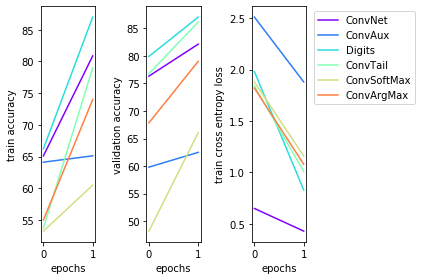

In [28]:
train_losses = [train_losses_convnet, 
                train_losses_conv_aux,
               train_losses_digits,
               train_losses_conv_tail,
               train_losses_tailnet_softmax,
               train_losses_tailnet_argmax]
train_accuracies = [train_accuracies_convnet,
                   train_accuracies_conv_aux,
                   train_accuracies_digits,
                   train_accuracies_conv_tail,
                   train_accuracies_tailnet_softmax,
                   train_accuracies_tailnet_argmax]
val_accuracies = [validation_accuracies_convnet,
                 validation_accuracies_conv_aux,
                 validation_accuracies_digits,
                 validation_accuracies_conv_tail,
                 validation_accuracies_tailnet_softmax,
                 validation_accuracies_tailnet_argmax]
labels = ["ConvNet",
         "ConvAux",
         "Digits",
         "ConvTail",
         "ConvSoftMax",
         "ConvArgMax"]
plt = multi_plot_training_epochs(nb_epochs, train_losses,
                                train_accuracies, val_accuracies,
                                labels, savefig="figures/conv_learning.png")